In [1]:
import pandas as pd

In [2]:
import utils.reschedule.sequence_tester as seq_tester
import utils.nervousness_comparator as nerv_comparator

In [3]:
file_template = "data/{prefix}_schedule_{day:02d}.csv"

In [4]:
file = "data/07_tardiness_init_plan.csv"

In [5]:
df_plan_init =  pd.read_csv(file)
df_plan_init = df_plan_init.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_init

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Tardiness
0,Job_000,0,0.00,1069.346415,M0,0.00,29.0,29.00,0.0
1,Job_000,1,0.00,1069.346415,M1,29.00,78.0,107.00,0.0
2,Job_000,2,0.00,1069.346415,M2,107.00,9.0,116.00,0.0
3,Job_000,3,0.00,1069.346415,M3,116.00,36.0,152.00,0.0
4,Job_000,4,0.00,1069.346415,M4,152.00,49.0,201.00,0.0
...,...,...,...,...,...,...,...,...,...
595,Job_150,5,11404.04,12473.386415,M5,11605.04,11.0,11616.04,0.0
596,Job_150,6,11404.04,12473.386415,M6,11616.04,62.0,11678.04,0.0
597,Job_150,7,11404.04,12473.386415,M7,11678.04,56.0,11734.04,0.0
598,Job_150,8,11404.04,12473.386415,M8,11734.04,44.0,11778.04,0.0


### Bicriterial Tag 1

In [7]:
file = file_template.format(prefix="07a",day=1)
file 

'data/07a_schedule_01.csv'

In [8]:
df_plan_01_devpen = pd.read_csv(file)
df_plan_01_devpen = df_plan_01_devpen.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_01_devpen

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Tardiness
0,Job_002,9,152.78,1690.473072,M4,1539.60,33.0,1572.60,0.0
1,Job_003,3,207.97,1981.190004,M4,1440.00,99.0,1539.00,0.0
2,Job_003,4,207.97,1981.190004,M6,1539.00,9.0,1548.00,0.0
3,Job_003,5,207.97,1981.190004,M8,1548.00,52.0,1600.00,0.0
4,Job_003,6,207.97,1981.190004,M7,1600.00,85.0,1685.00,0.0
...,...,...,...,...,...,...,...,...,...
728,Job_150,5,11404.04,12473.386415,M5,11605.04,11.0,11616.04,0.0
729,Job_150,6,11404.04,12473.386415,M6,11616.04,62.0,11678.04,0.0
730,Job_150,7,11404.04,12473.386415,M7,11678.04,56.0,11734.04,0.0
731,Job_150,8,11404.04,12473.386415,M8,11734.04,44.0,11778.04,0.0


In [9]:
df_job_tardiness_01_devpen = (
    df_plan_01_devpen.groupby('Job')
    .agg({
        'Tardiness': 'max',
        'Arrival': 'first'
    })
    .reset_index()
    .sort_values(by='Arrival')
)
df_job_tardiness_01_devpen

,Job,Tardiness,Arrival
0,Job_002,0.00,152.78
1,Job_003,0.00,207.97
2,Job_008,0.00,748.04
3,Job_009,0.00,781.95
4,Job_010,0.00,891.94
...,...,...,...
71,Job_095,1005.85,7200.00
72,Job_103,0.00,7948.04
73,Job_128,0.00,9830.89
74,Job_143,0.00,10971.94


### Simple Tag 1

In [11]:
file = file_template.format(prefix="07b_without",day=1)

df_plan_01 = pd.read_csv(file)
df_plan_01 = df_plan_01.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_01

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Tardiness
0,Job_002,9,152.78,1690.473072,M4,1478.14,33.0,1511.14,0.0
1,Job_003,3,207.97,1981.190004,M4,1511.74,99.0,1610.74,0.0
2,Job_003,4,207.97,1981.190004,M6,1610.74,9.0,1619.74,0.0
3,Job_003,5,207.97,1981.190004,M8,1619.74,52.0,1671.74,0.0
4,Job_003,6,207.97,1981.190004,M7,1671.74,85.0,1756.74,0.0
...,...,...,...,...,...,...,...,...,...
728,Job_150,5,11404.04,12473.386415,M5,11605.04,11.0,11616.04,0.0
729,Job_150,6,11404.04,12473.386415,M6,11616.04,62.0,11678.04,0.0
730,Job_150,7,11404.04,12473.386415,M7,11678.04,56.0,11734.04,0.0
731,Job_150,8,11404.04,12473.386415,M8,11734.04,44.0,11778.04,0.0


In [12]:
def aggregate_job_tardiness(df, col_job='Job', col_arrival='Arrival', col_tardiness='Tardiness'):
    df_result = (
        df.groupby(col_job)
        .agg({
            col_tardiness: 'max',
            col_arrival: 'first' # egal, da überall gleich
        })
        .reset_index()
        .sort_values(by=col_arrival)
    )
    
    return df_result

df_job_tardiness_01 = aggregate_job_tardiness(df_plan_01)
df_job_tardiness_01

,Job,Tardiness,Arrival
0,Job_002,0.00,152.78
1,Job_003,52.80,207.97
2,Job_008,153.55,748.04
3,Job_009,0.00,781.95
4,Job_010,0.00,891.94
...,...,...,...
71,Job_095,549.84,7200.00
72,Job_103,0.00,7948.04
73,Job_128,0.00,9830.89
74,Job_143,0.00,10971.94


## I) Abweichung vom Wunschtermin (Deadline)
> Tardiness

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def compare_and_plot_tardiness(df_a, df_b,
                               label_a='simple regeneration',
                               label_b='rescheduling with deviation penalty',
                               col_job='Job',
                               col_arrival='Arrival',
                               col_tardiness='Tardiness',
                               y_step=480,
                               figsize=(16, 8),
                               rotation=90,
                               show_regression=True):
    color_a = 'tab:blue'
    color_b = 'tab:olive'
    
    color_a_dark = 'darkblue'
    color_b_dark = 'tab:green'

    # Spaltennamen dynamisch aus Labels
    col_tardiness_a = f'Tardiness_{label_a.replace(" ", "_")}'
    col_tardiness_b = f'Tardiness_{label_b.replace(" ", "_")}'

    # Umbenennen
    df_a = df_a.rename(columns={col_tardiness: col_tardiness_a})
    df_b = df_b.rename(columns={col_tardiness: col_tardiness_b})

    # Merge
    df_compare = pd.merge(df_a, df_b, on=col_job, how='outer', suffixes=('_x', '_y'))
    df_compare['Arrival'] = df_compare[[f'{col_arrival}_x', f'{col_arrival}_y']].max(axis=1, skipna=True)
    df_compare.drop(columns=[f'{col_arrival}_x', f'{col_arrival}_y'], inplace=True)

    # Sortieren
    df_sorted = df_compare.sort_values(by='Arrival').reset_index(drop=True)
    x = np.arange(len(df_sorted)).reshape(-1, 1)
    jobs = df_sorted[col_job]

    # Y-Achsen-Ticks
    y_max = max(df_sorted[col_tardiness_a].max(), df_sorted[col_tardiness_b].max())
    y_ticks = np.arange(0, y_max + y_step, y_step)
    
    # Plot
    plt.figure(figsize=figsize)
    plt.plot(x, df_sorted[col_tardiness_a], marker='.', linestyle='--', label=label_a, color=color_a)
    plt.plot(x, df_sorted[col_tardiness_b], marker='*', linestyle='--', label=label_b, color=color_b)

    # Regressionslinien hinzufügen
    if show_regression:
        model_a = LinearRegression().fit(x, df_sorted[col_tardiness_a])
        model_b = LinearRegression().fit(x, df_sorted[col_tardiness_b])
        plt.plot(x, model_a.predict(x), linestyle='-', color=color_a_dark, label=f'{label_a} Trend')
        plt.plot(x, model_b.predict(x), linestyle='-', color=color_b_dark, label=f'{label_b} Trend')

    # Achsen und Layout
    plt.xlabel(f'{col_job} (sortiert nach {col_arrival})')
    plt.ylabel('Tardiness')
    plt.title(f'Tardiness-Vergleich ({label_a} vs. {label_b})')
    plt.xticks(ticks=x.flatten(), labels=jobs, rotation=rotation)
    plt.yticks(y_ticks)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return df_compare


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def compare_and_plot_tardiness(df_a, df_b,
                               label_a='simple regeneration',
                               label_b='rescheduling with deviation penalty',
                               col_job='Job',
                               col_arrival='Arrival',
                               col_tardiness='Tardiness',
                               y_step=480,
                               figsize=(16, 8),
                               rotation=90,
                               show_regression=True):
    color_a = 'tab:blue'
    color_b = 'tab:olive'
    color_a_dark = 'darkblue'
    color_b_dark = 'tab:green'

    # Spaltennamen dynamisch aus Labels
    col_tardiness_a = f'Tardiness_{label_a.replace(" ", "_")}'
    col_tardiness_b = f'Tardiness_{label_b.replace(" ", "_")}'

    # Umbenennen
    df_a = df_a.rename(columns={col_tardiness: col_tardiness_a})
    df_b = df_b.rename(columns={col_tardiness: col_tardiness_b})

    # Merge
    df_compare = pd.merge(df_a, df_b, on=col_job, how='outer', suffixes=('_x', '_y'))
    df_compare['Arrival'] = df_compare[[f'{col_arrival}_x', f'{col_arrival}_y']].max(axis=1, skipna=True)
    df_compare.drop(columns=[f'{col_arrival}_x', f'{col_arrival}_y'], inplace=True)

    # Sortieren
    df_sorted = df_compare.sort_values(by='Arrival').reset_index(drop=True)
    x = np.arange(len(df_sorted)).reshape(-1, 1)
    jobs = df_sorted[col_job]

    # === Spezialbehandlung fehlender Werte ===
    mid_index = len(df_sorted) // 2
    mask_nan = df_sorted[col_tardiness_a].isna() | df_sorted[col_tardiness_b].isna()

    # Erste Hälfte: ersetze NaNs durch 0
    first_half = df_sorted.iloc[:mid_index].copy()
    first_half.loc[:, [col_tardiness_a, col_tardiness_b]] = \
        first_half[[col_tardiness_a, col_tardiness_b]].fillna(0)

    # Zweite Hälfte: entferne Zeilen mit NaN (nach Anzeige)
    second_half = df_sorted.iloc[mid_index:].copy()
    nan_rows = second_half[mask_nan.iloc[mid_index:]]

    if not nan_rows.empty:
        print("Entfernte Zeilen mit NaN in der zweiten Hälfte:")
        print(nan_rows[[col_job, col_tardiness_a, col_tardiness_b]])

    second_half = second_half[~mask_nan.iloc[mid_index:]]

    # Zusammenfügen
    df_sorted = pd.concat([first_half, second_half], ignore_index=True)
    x = np.arange(len(df_sorted)).reshape(-1, 1)
    jobs = df_sorted[col_job]

    # Y-Achsen-Ticks
    y_max = max(df_sorted[col_tardiness_a].max(), df_sorted[col_tardiness_b].max())
    y_ticks = np.arange(0, y_max + y_step, y_step)

    # Plot
    plt.figure(figsize=figsize)
    plt.plot(x, df_sorted[col_tardiness_a], marker='.', linestyle='--', label=label_a, color=color_a)
    plt.plot(x, df_sorted[col_tardiness_b], marker='*', linestyle='--', label=label_b, color=color_b)

    # Regressionslinien hinzufügen
    if show_regression:
        mask_a = df_sorted[col_tardiness_a].notna()
        x_a = x[mask_a]
        y_a = df_sorted.loc[mask_a, col_tardiness_a]

        mask_b = df_sorted[col_tardiness_b].notna()
        x_b = x[mask_b]
        y_b = df_sorted.loc[mask_b, col_tardiness_b]

        model_a = LinearRegression().fit(x_a, y_a)
        model_b = LinearRegression().fit(x_b, y_b)

        plt.plot(x_a, model_a.predict(x_a), linestyle='-', color=color_a_dark, label=f'{label_a} Trend')
        plt.plot(x_b, model_b.predict(x_b), linestyle='-', color=color_b_dark, label=f'{label_b} Trend')

    # Achsen und Layout
    plt.xlabel(f'{col_job} (sortiert nach {col_arrival})')
    plt.ylabel('Tardiness')
    plt.title(f'Tardiness-Vergleich ({label_a} vs. {label_b})')
    plt.xticks(ticks=x.flatten(), labels=jobs, rotation=rotation)
    plt.yticks(y_ticks)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return df_sorted


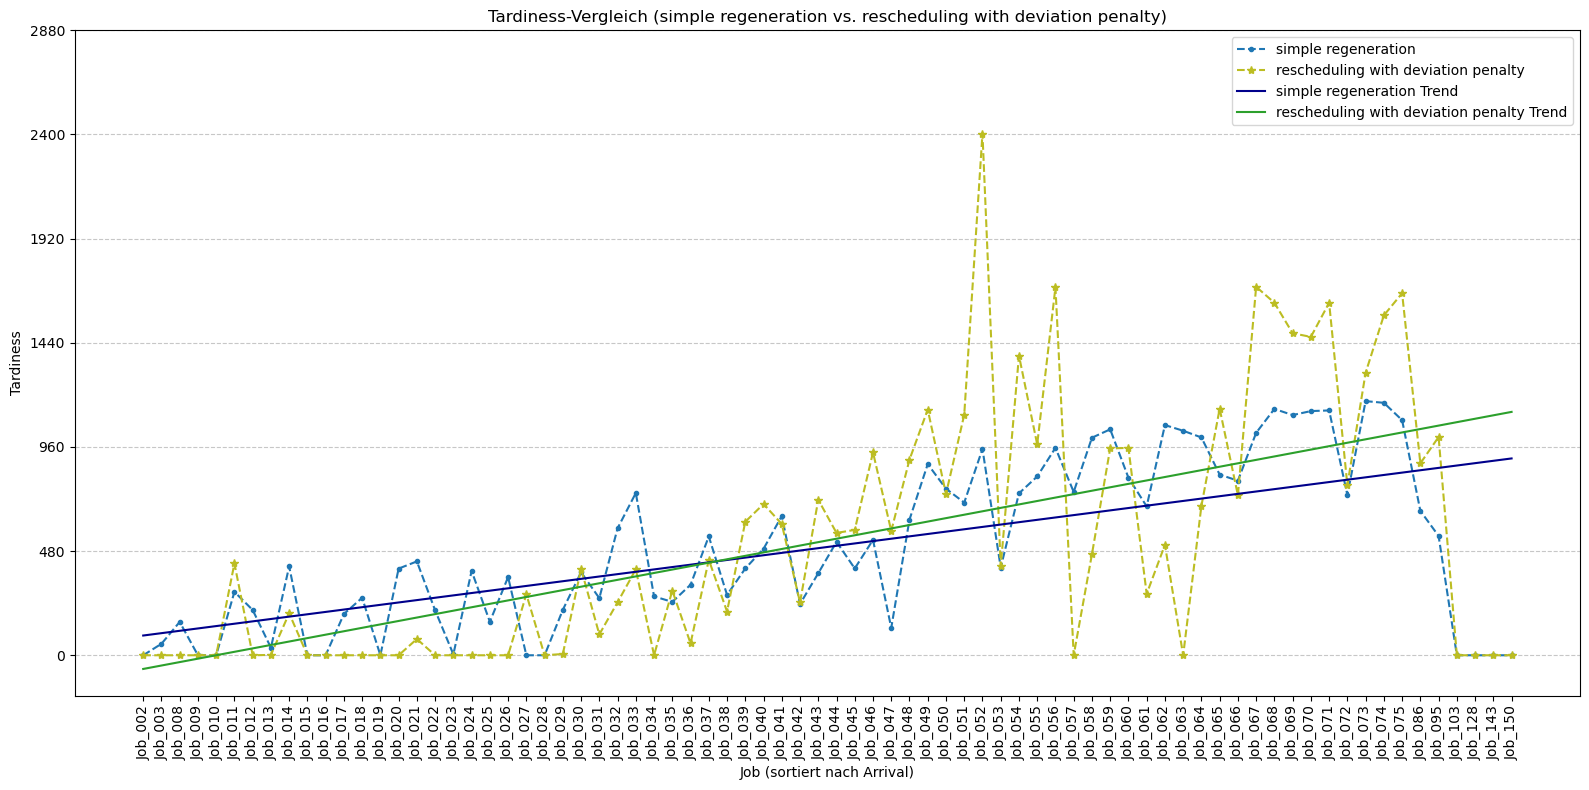

In [16]:
df_compare = compare_and_plot_tardiness(
    df_job_tardiness_01,
    df_job_tardiness_01_devpen,
)


### Tag 2

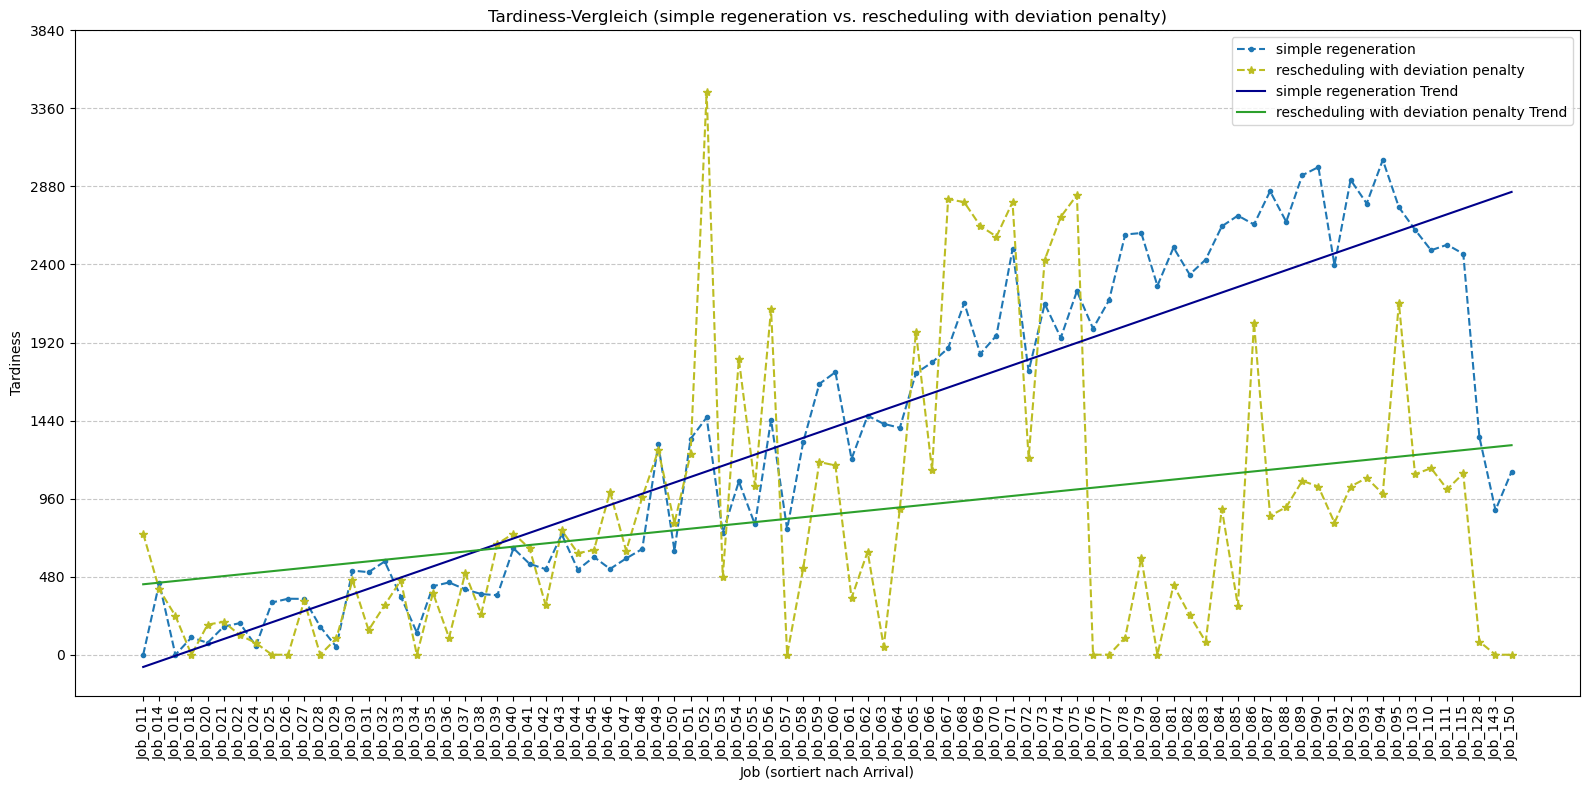

In [18]:
file = file_template.format(prefix="07b_without",day=2)
df_plan_02 = pd.read_csv(file)

file = file_template.format(prefix="07a",day=2)
df_plan_02_devpen = pd.read_csv(file)

df_job_tardiness_02 = aggregate_job_tardiness(df_plan_02)
df_job_tardiness_02_devpen = aggregate_job_tardiness(df_plan_02_devpen)


df_compare = compare_and_plot_tardiness(
    df_job_tardiness_02,
    df_job_tardiness_02_devpen,
)

### Tag 3

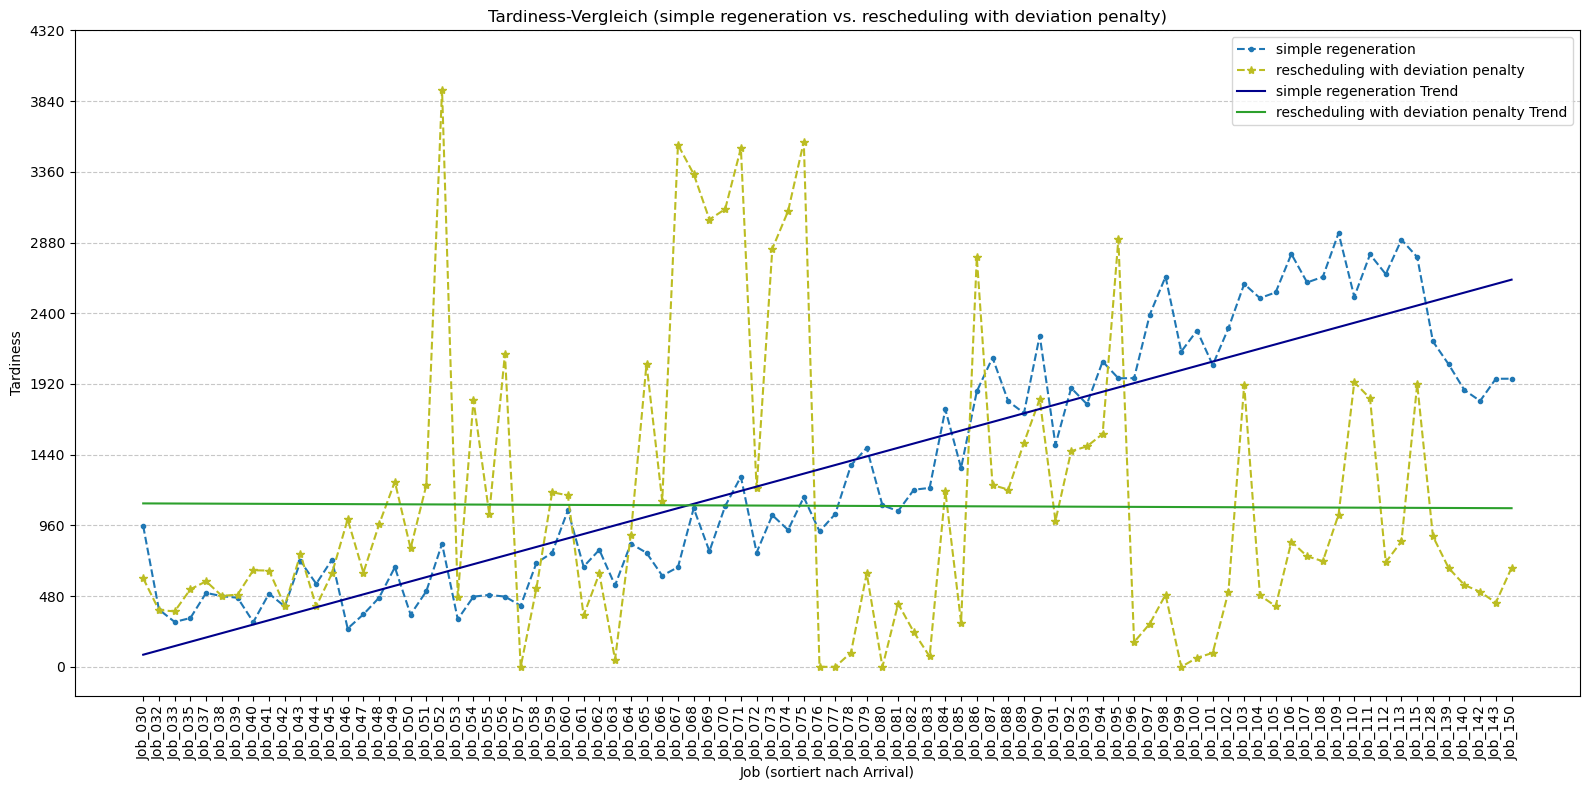

In [20]:
file = file_template.format(prefix="07b_without",day=3)
df_plan_03 = pd.read_csv(file)

file = file_template.format(prefix="07a",day=3)
df_plan_03_devpen = pd.read_csv(file)

df_job_tardiness_03 = aggregate_job_tardiness(df_plan_03)
df_job_tardiness_03_devpen = aggregate_job_tardiness(df_plan_03_devpen)


df_compare = compare_and_plot_tardiness(
    df_job_tardiness_03,
    df_job_tardiness_03_devpen,
)

## II) Plan-Nervosität

### a) Hwango

### Tag 1

In [24]:
T1 = 1440
P_T_simple, details = nerv_comparator.compute_P_T(df_plan_init, df_plan_01, T1, verbose=False)
P_T_simple

51347.23927079377

In [25]:
P_T_devpen, details = nerv_comparator.compute_P_T(df_plan_init, df_plan_01_devpen, T1, verbose=False)
P_T_devpen

14807.950950617196

### Tag 2

In [27]:
T1 = 1440*2
P_T_simple, details = nerv_comparator.compute_P_T(df_plan_01, df_plan_02, T1, verbose=False)
P_T_simple

134671.39001719584

In [28]:
P_T_devpen, details = nerv_comparator.compute_P_T(df_plan_01_devpen, df_plan_02_devpen, T1, verbose=False)
P_T_devpen

51827.36408952357

### Tag 3

In [30]:
T1 = 1440*3
P_T_simple, details = nerv_comparator.compute_P_T(df_plan_02, df_plan_03, T1, verbose=False)
P_T_simple

202627.58097877796

In [32]:
P_T_devpen, details = nerv_comparator.compute_P_T(df_plan_02_devpen, df_plan_03_devpen, T1, verbose=False)
P_T_devpen

26169.543820102765

In [33]:
 details

,Job,Operation,Start_plan,Start_rev,delta_t,g,contrib
1,Job_030,9,4386.21,4527.86,141.65,0.986332,139.713996
3,Job_033,3,4424.21,4355.12,69.09,0.978581,67.610171
4,Job_033,4,4523.21,4454.12,69.09,0.958695,66.236265
5,Job_033,5,4532.21,4475.26,56.95,0.956909,54.495981
6,Job_033,6,4584.21,4527.26,56.95,0.946658,53.912181
...,...,...,...,...,...,...,...
646,Job_150,5,12147.41,12952.06,804.65,0.070993,57.124785
647,Job_150,6,12158.41,12963.06,804.65,0.070180,56.470336
648,Job_150,7,12220.41,13025.06,804.65,0.065609,52.792657
649,Job_150,8,12276.41,13081.06,804.65,0.061501,49.486884


### b) Wu

In [85]:
import pandas as pd

def calculate_total_deviation_wu(
    df_original: pd.DataFrame,
    df_new: pd.DataFrame,
    job_col: str = "Job",
    op_col: str = "Operation",
    start_col: str = "Start"
) -> float:
    """
    Berechnet die Gesamtabweichung der Startzeiten zwischen dem neuen und ursprünglichen Plan.

    Parameter:
    - df_new: DataFrame mit Spalten für Job, Operation und Startzeit (neuer Plan)
    - df_original: DataFrame mit Spalten für Job, Operation und Startzeit (ursprünglicher Plan)
    - job_col, op_col, start_col: Spaltennamen für Job, Operation und Startzeit

    Rückgabe:
    - Gesamt-Deviation (float): Summe der absoluten Abweichungen
    """
    # Join nach Job und Operation
    merged = pd.merge(
        df_new[[job_col, op_col, start_col]],
        df_original[[job_col, op_col, start_col]],
        on=[job_col, op_col],
        suffixes=('_new', '_orig')
    )

    # Abweichung berechnen
    merged['Deviation'] = (merged[f"{start_col}_new"] - merged[f"{start_col}_orig"]).abs()

    return merged['Deviation'].sum()


### Tag 1

In [88]:
calculate_total_deviation_wu(df_plan_init, df_plan_01)

103799.8

In [90]:
calculate_total_deviation_wu(df_plan_init, df_plan_01_devpen)

46897.65000000001

### Tag 2

In [42]:
calculate_total_deviation_wu(df_plan_01, df_plan_02)

336829.96

In [44]:
calculate_total_deviation_wu(df_plan_01_devpen, df_plan_02_devpen)

162094.8

### Tag 3

In [51]:
calculate_total_deviation_wu(df_plan_02, df_plan_03)

486001.59

In [53]:
calculate_total_deviation_wu(df_plan_02_devpen, df_plan_03_devpen)

104416.37000000001

In [69]:
def calculate_first_last_deviation_per_job(
    df_original: pd.DataFrame,
    df_new: pd.DataFrame,
    job_col: str = "Job",
    op_col: str = "Operation",
    start_col: str = "Start"
) -> pd.DataFrame:
    """
    Berechnet die Abweichung der ersten und letzten Operation je Job.

    Rückgabe:
    - DataFrame mit ['Job', 'FirstDeviation', 'LastDeviation']
    """

    # Merge nach Job und Operation
    merged = pd.merge(
        df_new[[job_col, op_col, start_col]],
        df_original[[job_col, op_col, start_col]],
        on=[job_col, op_col],
        suffixes=('_new', '_orig')
    )

    # Abweichung berechnen
    merged['Deviation'] = (merged[f"{start_col}_new"] - merged[f"{start_col}_orig"]).abs()

    # Sortieren für first/last Operation
    merged_sorted = merged.sort_values(by=[job_col, op_col])

    # First and last deviation je Job
    firsts = merged_sorted.groupby(job_col).first().reset_index()
    lasts = merged_sorted.groupby(job_col).last().reset_index()

    result = pd.DataFrame({
        job_col: firsts[job_col],
        'FirstDeviation': firsts['Deviation'],
        'LastDeviation': lasts['Deviation']
    })

    return result

In [156]:
import matplotlib.pyplot as plt
import numpy as np

def plot_first_last_deviation(deviation_df, job_col="Job", y_max=None, y_tick_step=480):
    """
    Plottet FirstDeviation und LastDeviation je Job als Linienplot mit fixer Y-Achse.
    
    Parameter:
    - deviation_df: DataFrame mit Spalten 'Job', 'FirstDeviation', 'LastDeviation'
    - job_col: Spaltenname für Jobs
    - y_max: fester Maximalwert für die Y-Achse (wenn None, automatische Skalierung)
    - y_tick_step: Abstand der Y-Achsenraster (z.B. 480), wenn None: Standardraster
    """
    plt.figure(figsize=(10, 5))

    x = deviation_df[job_col].astype(str)

    plt.plot(x, deviation_df['FirstDeviation'], marker='o', label='First Deviation')
    plt.plot(x, deviation_df['LastDeviation'], marker='s', label='Last Deviation')

    plt.xlabel("Job")
    plt.ylabel("Deviation")
    plt.title("First & Last Deviation per Job")
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.legend()

    if y_max is not None:
        plt.ylim(0, y_max)
        if y_tick_step is not None:
            yticks = np.arange(0, y_max + y_tick_step, y_tick_step)
            plt.yticks(yticks)

    plt.tight_layout()
    plt.show()



### Tag 1

In [159]:
deviation_simple_01 = calculate_first_last_deviation_per_job(df_plan_init, df_plan_01)
deviation_simple_01.head()

,Job,FirstDeviation,LastDeviation
0,Job_002,48.60,48.60
1,Job_003,48.60,87.65
2,Job_008,21.51,168.45
3,Job_009,191.05,187.80
4,Job_010,167.71,122.45


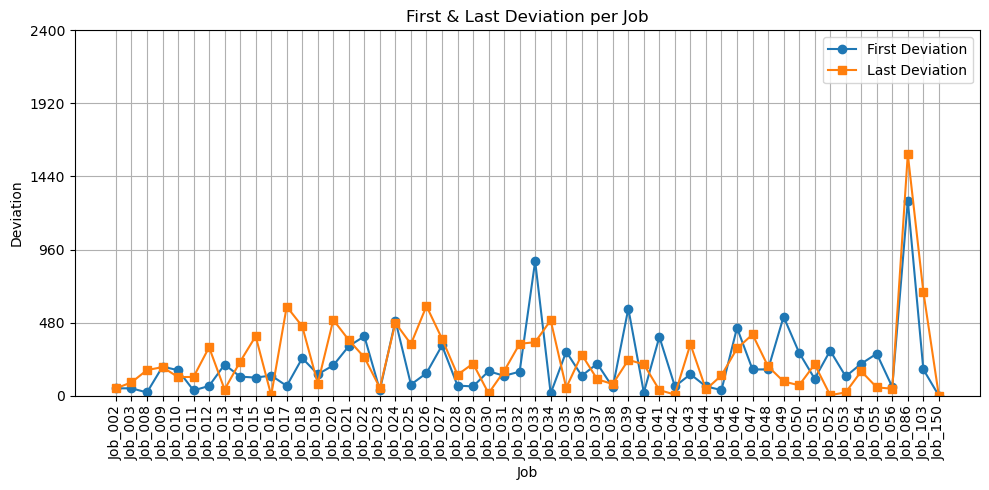

In [161]:
plot_first_last_deviation(deviation_simple_01,  y_max=2000)

In [163]:
deviation_simple_01_devpen = calculate_first_last_deviation_per_job(df_plan_init, df_plan_01_devpen)
deviation_simple_01_devpen.head()

,Job,FirstDeviation,LastDeviation
0,Job_002,110.06,110.06
1,Job_003,23.14,74.14
2,Job_008,57.60,243.14
3,Job_009,97.94,106.26
4,Job_010,167.71,5.34


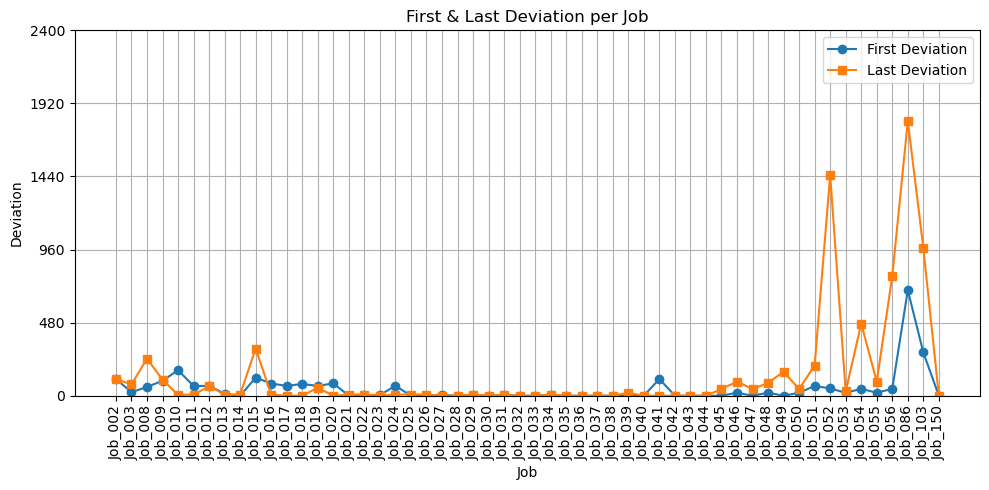

In [165]:
plot_first_last_deviation(deviation_simple_01_devpen,  y_max=2000)

### Tag 2

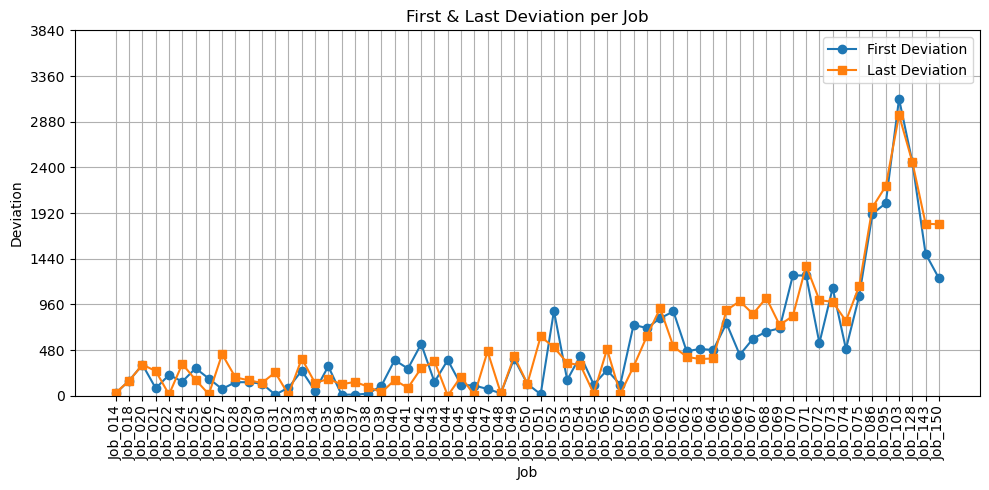

In [167]:
deviation_simple_02 = calculate_first_last_deviation_per_job(df_plan_01, df_plan_02)
plot_first_last_deviation(deviation_simple_02,  y_max=3500)

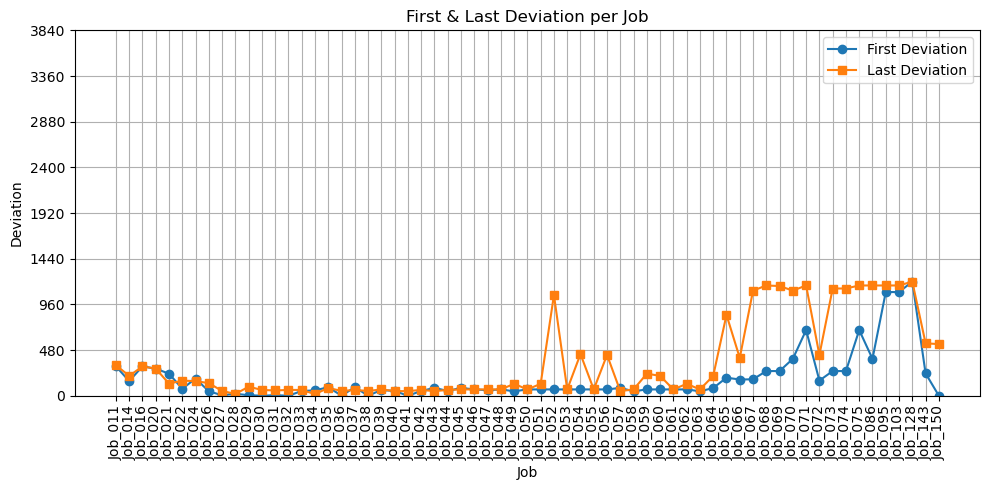

In [169]:
deviation_simple_02_devpen = calculate_first_last_deviation_per_job(df_plan_01_devpen, df_plan_02_devpen)
plot_first_last_deviation(deviation_simple_02_devpen,  y_max=3500)

### Tag 3

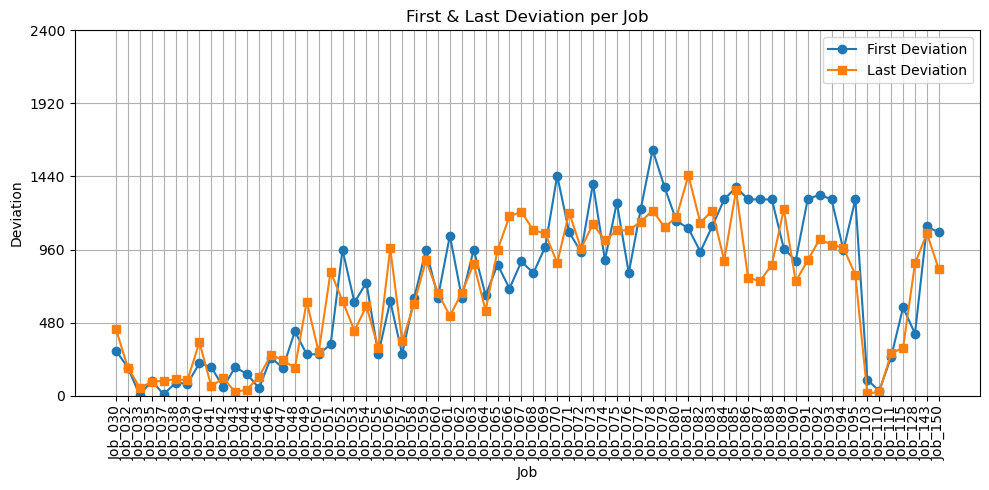

In [171]:
deviation_simple_03 = calculate_first_last_deviation_per_job(df_plan_02, df_plan_03)
plot_first_last_deviation(deviation_simple_03,  y_max=2000)

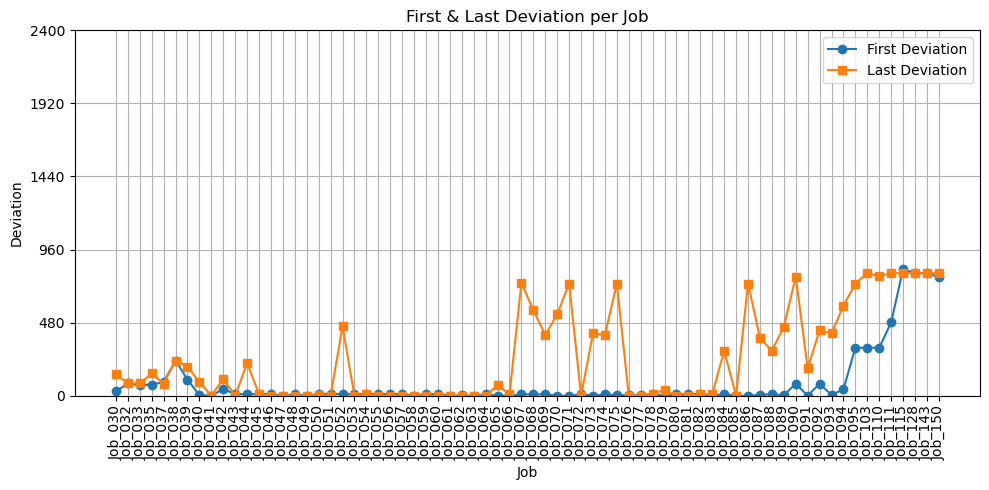

In [172]:
deviation_simple_03_devpen = calculate_first_last_deviation_per_job(df_plan_02_devpen, df_plan_03_devpen)
plot_first_last_deviation(deviation_simple_03_devpen,  y_max=2000)